In [81]:
import pandas as pd
import datetime as dt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import plotly.express as px

In [82]:
data = pd.read_excel('merged_clean.xlsx')

In [116]:
data.head(20)

,Document_number,Order_date,Distribution_type,Partner_code,Product,Product_type,Payment_type,Quantity_measurement,Quantity,Unit_price,...,Customer_country,Address_updated,Latitude,Longitude,Adjusted_Sales,Is_weekend,Year,Month,CohortMonth,CohortIndex
0,118099,2022-01-03,Експедиция - изход,2211000000011,Суджук за приятели,Сурово-сушени колбаси и деликатеси->Сурово-суш...,В брой,кг.,10.300,16.50,...,България,2016,44.114727,27.26719,169.95,False,2022,1,2022-01,0
1,118100,2022-01-03,Пласмент База,2282802584711,Хамбургски,Малотрайни колбаси,В брой,кг.,21.070,4.20,...,България,2016,44.114727,27.26719,88.49,False,2022,1,2022-01,0
2,118101,2022-01-03,Пласмент База,2211804214811,Пастърма натурална - ХТСХ парчета (вакуум),Сурово-сушени колбаси и деликатеси->Сурово-суш...,В брой,кг.,0.320,41.40,...,България,2016,44.114727,27.26719,12.85,False,2022,1,2022-01,0
3,118101,2022-01-03,Пласмент База,2211804214811,Сланина ВП (вакуум),Варено-пушени деликатеси,В брой,кг.,1.380,6.70,...,България,2016,44.114727,27.26719,8.97,False,2022,1,2022-01,0
4,118101,2022-01-03,Пласмент База,2211804214811,Пилешко печено вакуум,Полуфабрикати,В брой,кг.,0.470,12.55,...,България,2016,44.114727,27.26719,5.72,False,2022,1,2022-01,0
5,118101,2022-01-03,Пласмент База,2211804214811,Бургас (вакуум),Трайни и полутрайни варено-пушени салами,В брой,кг.,1.746,10.60,...,България,2016,44.114727,27.26719,17.95,False,2022,1,2022-01,0
6,118101,2022-01-03,Пласмент База,2211804214811,Шунков шпек (вакуум),Трайни и полутрайни варено-пушени салами,В брой,кг.,0.600,12.10,...,България,2016,44.114727,27.26719,7.04,False,2022,1,2022-01,0
7,118101,2022-01-03,Пласмент База,2211804214811,Амбарица (вакуум),Сурово-сушени колбаси и деликатеси->Сурово-суш...,В брой,кг.,0.644,16.20,...,България,2016,44.114727,27.26719,10.12,False,2022,1,2022-01,0
8,118101,2022-01-03,Пласмент База,2211804214811,Кълцаница (вакуум),Сурово-сушени колбаси и деликатеси->Сурово-суш...,В брой,кг.,0.890,23.60,...,България,2016,44.114727,27.26719,20.37,False,2022,1,2022-01,0
9,118101,2022-01-03,Пласмент База,2211804214811,"Луканка ""Смядовска специална"" (вакуум)",Сурово-сушени колбаси и деликатеси->Сурово-суш...,В брой,кг.,1.060,15.70,...,България,2016,44.114727,27.26719,16.14,False,2022,1,2022-01,0


In [83]:
# Inspect the dataset
print(data.head())
print(data.info())

   Document_number Order_date   Distribution_type   Partner_code  \
0           118099 2022-01-03  Експедиция - изход  2211000000011   
1           118100 2022-01-03       Пласмент База  2282802584711   
2           118101 2022-01-03       Пласмент База  2211804214811   
3           118101 2022-01-03       Пласмент База  2211804214811   
4           118101 2022-01-03       Пласмент База  2211804214811   

                                      Product  \
0                          Суджук за приятели   
1                                  Хамбургски   
2  Пастърма натурална - ХТСХ парчета (вакуум)   
3                         Сланина ВП (вакуум)   
4                       Пилешко печено вакуум   

                                        Product_type Payment_type  \
0  Сурово-сушени колбаси и деликатеси->Сурово-суш...       В брой   
1                                 Малотрайни колбаси       В брой   
2  Сурово-сушени колбаси и деликатеси->Сурово-суш...       В брой   
3                   

In [84]:
# Check for duplicate rows
duplicate_rows = data.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

# Optionally, display the duplicate rows
if duplicate_rows.sum() > 0:
    print(data[duplicate_rows])

Number of duplicate rows: 0


# Calculate Frequency, Monetary and Discount columns

In [85]:
# Convert Order Date to datetime
data['Order_date'] = pd.to_datetime(data['Order_date'])

In [86]:
# Define the reference date as the day after the last order date
#reference_date = data['Order_date'].max() + dt.timedelta(days=1)

In [87]:
# Check for null or NaN values
null_sales = data['Sales'].isnull().sum()
null_discount = data['Discount_lv'].isnull().sum()

print(f"\nNumber of null or NaN values in 'Sales': {null_sales}")
print(f"Number of null or NaN values in 'Discount_lv': {null_discount}")

# Check for negative values in 'Sales' and 'Discount_lv'
negative_sales = (data['Sales'] < 0).sum()
negative_discount = (data['Discount_lv'] < 0).sum()

print(f"\nNumber of negative values in 'Sales': {negative_sales}")
print(f"Number of negative values in 'Discount_lv': {negative_discount}")


# Handling negative values in 'Discount_lv'
# Assuming negative values in 'Discount_lv' represent discounts correctly
# No transformation is necessary unless your business logic dictates otherwise



Number of null or NaN values in 'Sales': 0
Number of null or NaN values in 'Discount_lv': 0

Number of negative values in 'Sales': 9437
Number of negative values in 'Discount_lv': 204522


In [88]:
# I would like to crate the model only for the Bulgarian customers

In [89]:
data = data[data['Customer_country'] == 'България']

In [90]:
# Create RFM table
fmd_table = data.groupby('Partner_code').agg({
    #'Order_date': lambda x: (reference_date - x.max()).days,
    'Document_number': 'count',
    'Sales': 'sum',
    'Discount_lv': 'sum'
}).reset_index()

In [91]:
# Rename columns
fmd_table.columns = ['Customer ID', 'Frequency', 'Monetary', 'Total Discount']

In [92]:

# Inspect RFM table
print(fmd_table.head())

      Customer ID  Frequency    Monetary  Total Discount
0   2210000000011      10629  3240270.88            0.00
1   2210327922511        590    42527.11            0.00
2   2210450725811          1       80.18            0.00
3   2211000000011      12392   318859.15         -333.53
4  22112211221111          7       61.35            0.00


## Scaling

In [ ]:
# Normalize RFM values
scaler = StandardScaler()
fmd_table = scaler.fit_transform(fmd_table[['Frequency', 'Monetary', 'Total Discount']])


In [ ]:
fm_table.head(3)

## Checking for Outliers

In [93]:
# Function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [94]:
# Detect outliers in each RFM metric
frequency_outliers = detect_outliers(fmd_table, 'Frequency')
monetary_outliers = detect_outliers(fmd_table, 'Monetary')
discount_outliers = detect_outliers(fmd_table, 'Total Discount')

In [95]:
# Print outliers
print(f"Recency Outliers:\n{discount_outliers}")
print(f"Frequency Outliers:\n{frequency_outliers}")
print(f"Monetary Outliers:\n{monetary_outliers}")

Recency Outliers:
       Customer ID  Frequency   Monetary  Total Discount
3    2211000000011      12392  318859.15         -333.53
9    2211760501911       1188   97061.16        -8440.21
10   2211800020811       1433   28815.62        -1080.65
13   2211800696911       1433   22682.61         -463.36
21   2211801493011       3863   61768.70        -2496.58
..             ...        ...        ...             ...
342  2220744454711        363    9551.23         -166.31
358  2282800153211       1952   85294.93        -2997.83
363  2282801466111       1454  303739.78       -30534.24
364  2282801624211       2643   40632.53        -1251.02
379  2282806745011       1193  229122.41       -20413.03

[90 rows x 4 columns]
Frequency Outliers:
       Customer ID  Frequency    Monetary  Total Discount
0    2210000000011      10629  3240270.88            0.00
3    2211000000011      12392   318859.15         -333.53
21   2211801493011       3863    61768.70        -2496.58
29   2211802993211     

In [96]:
# Remove outliers
fmd_table_no_outliers = fmd_table[~fmd_table['Customer ID'].isin(discount_outliers['Customer ID'])]
fmd_table_no_outliers = fmd_table_no_outliers[~fmd_table_no_outliers['Customer ID'].isin(frequency_outliers['Customer ID'])]
fmd_table_no_outliers = fmd_table_no_outliers[~fmd_table_no_outliers['Customer ID'].isin(monetary_outliers['Customer ID'])]


In [97]:
fmd_table_no_outliers.head(3)

,Customer ID,Frequency,Monetary,Total Discount
1,2210327922511,590,42527.11,0.0
2,2210450725811,1,80.18,0.0
4,22112211221111,7,61.35,0.0


In [98]:
fmd_table_no_outliers.shape

(280, 4)

# The Model

In [101]:
## Determin the optimal number of clusters using the elbow method

In [102]:
from sklearn.metrics import silhouette_score

c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



For n_clusters = 2, the average silhouette_score is : 0.6891961051802947


c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



For n_clusters = 3, the average silhouette_score is : 0.6938563436391567


c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



For n_clusters = 4, the average silhouette_score is : 0.6258348241978243


c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



For n_clusters = 5, the average silhouette_score is : 0.6261022047701376


c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



For n_clusters = 6, the average silhouette_score is : 0.6367488832095627


c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



For n_clusters = 7, the average silhouette_score is : 0.6442727729611905


c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



For n_clusters = 8, the average silhouette_score is : 0.6106218731793186


c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



For n_clusters = 9, the average silhouette_score is : 0.5185448657595684


c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



For n_clusters = 10, the average silhouette_score is : 0.5327193321817683


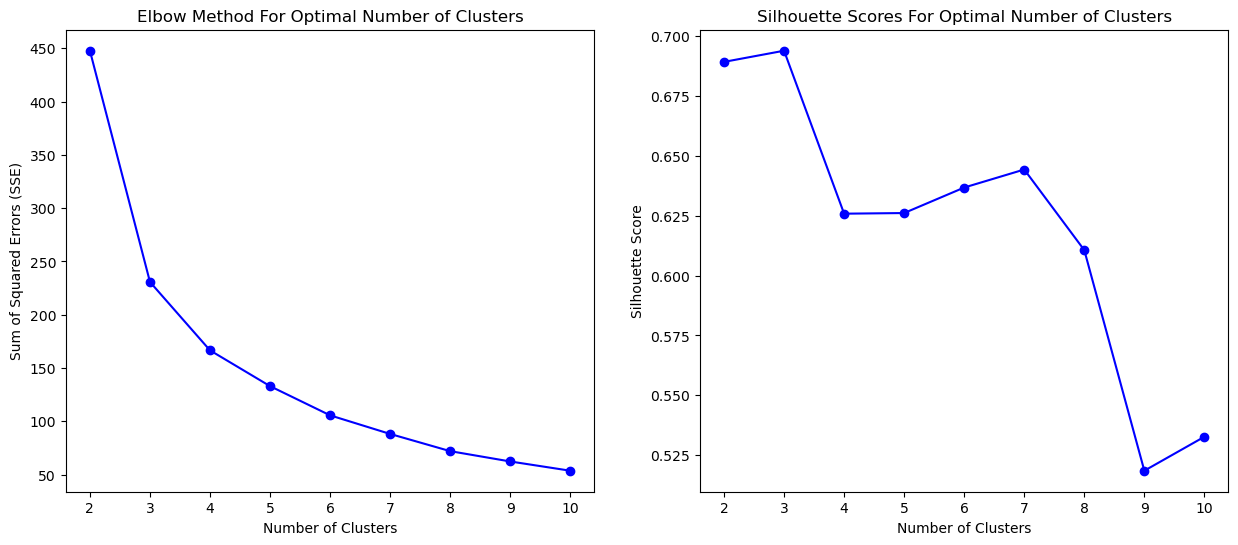

In [103]:
# Determine the optimal number of clusters using the elbow method and silhouette score
sse = {}
silhouette_scores = []
range_n_clusters = list(range(2, 11))

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(fmd_table_no_outliers)
    sse[k] = kmeans.inertia_
    silhouette_avg = silhouette_score(fmd_table_no_outliers, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the average silhouette_score is : {silhouette_avg}")

# Plot the elbow curve and silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Elbow Method
ax1.plot(list(sse.keys()), list(sse.values()), 'bo-')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Sum of Squared Errors (SSE)')
ax1.set_title('Elbow Method For Optimal Number of Clusters')

# Silhouette Scores
ax2.plot(range_n_clusters, silhouette_scores, 'bo-')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Scores For Optimal Number of Clusters')

plt.show()

In [104]:
k_optimal=5

In [105]:
## Fit the model

In [106]:
kmeans = KMeans(n_clusters=k_optimal, random_state=42)

In [107]:
fmd_table_no_outliers['Cluster'] = kmeans.fit_predict(fmd_normalized)

c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



<Axes: xlabel='Cluster', ylabel='Monetary'>

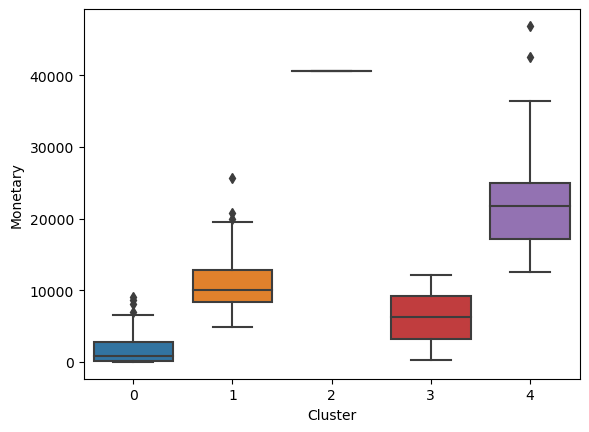

In [108]:
# Box plot to visualize Cluster Id vs Amount
sns.boxplot(x='Cluster', y='Monetary', data=fmd_table_no_outliers)

<Axes: xlabel='Cluster', ylabel='Frequency'>

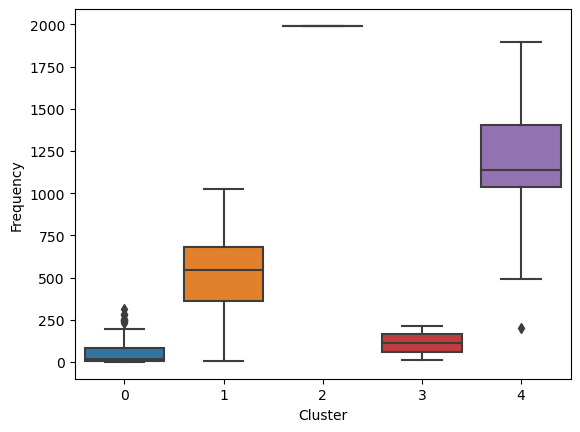

In [109]:

# Box plot to visualize Cluster Id vs Frequency
sns.boxplot(x='Cluster', y='Frequency', data=fmd_table_no_outliers)

<Axes: xlabel='Cluster', ylabel='Total Discount'>

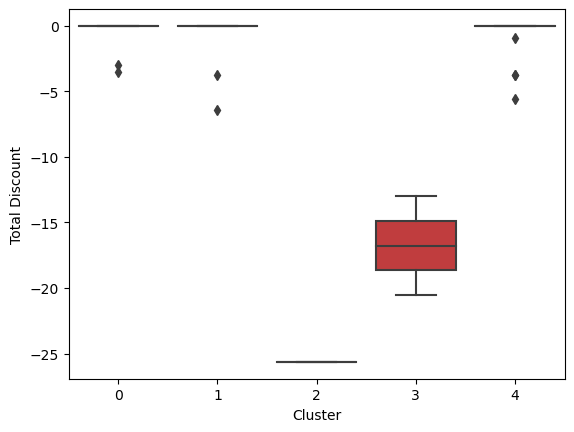

In [110]:
# Box plot to visualize Cluster Id vs Recency
sns.boxplot(x='Cluster', y='Total Discount', data=fmd_table_no_outliers)

In [111]:
fmd_table_no_outliers.head(3)
rfm_analysis=fmd_table_no_outliers[['Frequency', 'Cluster', 'Monetary', 'Total Discount']]

In [112]:
## Analyse the clusters

In [113]:
cluster_analysis = rfm_analysis.groupby('Cluster').mean().reset_index()
print(cluster_analysis)

   Cluster    Frequency      Monetary  Total Discount
0        0    54.411765   1726.758556       -0.034866
1        1   524.230769  10803.698846       -0.195385
2        2  1991.000000  40540.190000      -25.640000
3        3   112.500000   6209.820000      -16.775000
4        4  1161.368421  23021.670000       -0.367105


c:\Users\gabb_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



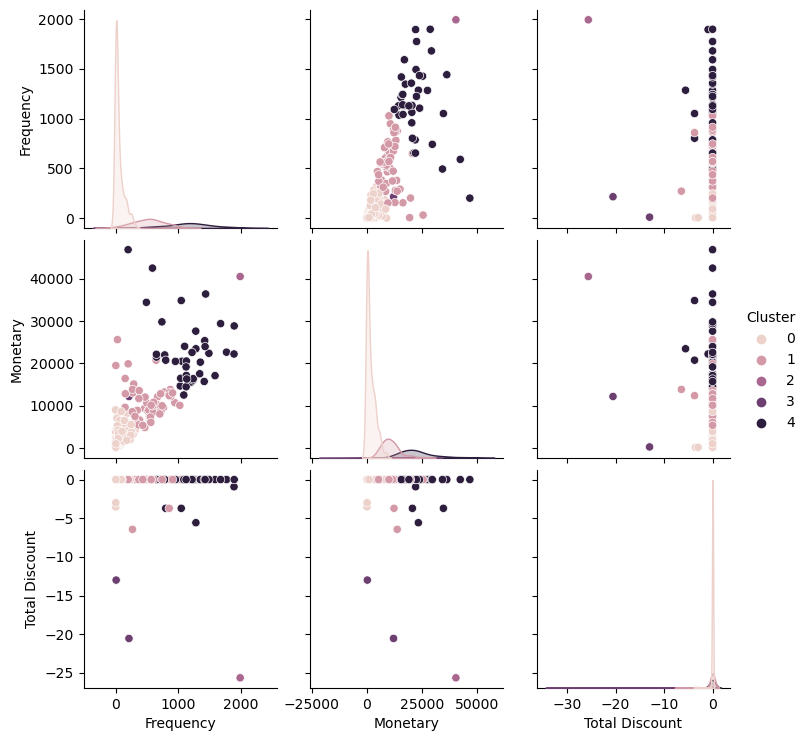

In [114]:
# Visualize clusters
sns.pairplot(fmd_table_no_outliers, hue='Cluster', vars=['Frequency', 'Monetary', 'Total Discount'])
plt.show()

In [115]:
# 3D Scatter Plot using Plotly Express for k=2 with customizations
fig = px.scatter_3d(fmd_table_no_outliers, x='Frequency', y='Monetary', z='Total Discount', color='Cluster',
                    title=f'3D Scatter Plot of FMD',
                    hover_data=['Customer ID', 'Frequency', 'Monetary', 'Total Discount'],
                    color_continuous_scale=['violet', 'white', 'green'])

# Update layout for background color and marker properties
fig.update_layout(
    scene=dict(
        xaxis=dict(backgroundcolor="black"),
        yaxis=dict(backgroundcolor="black"),
        zaxis=dict(backgroundcolor="black"),
    ),
    paper_bgcolor="black",
    plot_bgcolor="black",
    font=dict(color='white'),
    width=1200,  # Increase width
    height=800  # Increase height
)

# Update marker properties
fig.update_traces(marker=dict(size=5, opacity=0.6))

# Show the plot
fig.show()

In [117]:
fmd_table_no_outliers.head(2)

,Customer ID,Frequency,Monetary,Total Discount,Cluster
1,2210327922511,590,42527.11,0.0,4
2,2210450725811,1,80.18,0.0,0


In [118]:
fmd_table_no_outliers.to_csv('cluster_report.csv', index=False)